# Coughvid Detector

An application to discriminate between cough due to COVID19 or another disease based on a cough audio sample and other anagraphic and symptoms data.

At the core of this logistic are a convoluted neural network (CNN) and a random forest classifier (RFC), which are combined to predict the class label (covid or not). The audio sample is segmented using a hysteresis comparator on the signal power, preprocessed (normalized, filtered, downsampled), and fed to an extreme gradient booster (XGB) to check if it is actually a cough sample. If it is, then the preprocessed sample is converted to a spectrogram in order to be fed to the CNN, whose is then combined with the personal data (both personal data and symptoms report) in order increase features and thus model accuracy. Those final features are then fed to the RFC, which does the final logistic classification. The use of a CNN for this kind of task instead of a RNN should result in a better margin of performance, see: [Rethinking CNN Models for Audio Classification](https://arxiv.org/abs/2007.11154) and [Exploring convolutional, recurrent, and hybrid deep neural networks for speech and music detection in a large audio dataset](https://asmp-eurasipjournals.springeropen.com/articles/10.1186/s13636-019-0152-1)

The dataset and a the segmentation function comes from this paper: [The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms](https://www.nature.com/articles/s41597-021-00937-4), the original dataset of the paper is [here](https://zenodo.org/record/4498364), but for convinience you can find the already converted .wav version here on [Kaggle](https://www.kaggle.com/datasets/nasrulhakim86/coughvid-wav) (the original one uses .ogg and .webm formats. The official repository of the paper is [here](https://c4science.ch/diffusion/10770/)

The general logic scheme behind it is shown in the diagram below:

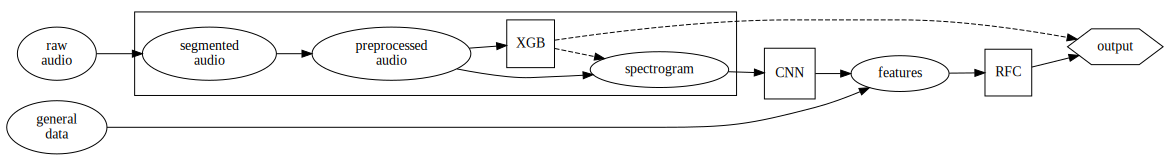

In [40]:
from graphviz import Digraph

g = Digraph(
    graph_attr={
        'rankdir':'LR',
        'size':'20'
    }
)

with g.subgraph() as s:
    s.attr(rank='same')
    s.node('A', 'raw\naudio')
    s.node('D', 'general\ndata')

with g.subgraph(name='cluster_a') as c:
    c.node('a', 'segmented\naudio')
    c.node('b', 'preprocessed\naudio')
    c.node('c', 'XGB', shape='square')
    c.edges(['Aa', 'ab', 'bc', 'bS'])
    c.edge('c', 'S', style='dashed')

g.node('S', 'spectrogram')
g.node('C', 'CNN', shape='square')
g.node('R', 'RFC', shape='square')
g.node('F', 'features')
g.node('O', 'output', shape='hexagon')

g.edges(['SC', 'CF', 'DF', 'FR', 'RO'])
g.edge('c', 'O', style='dashed')

g
